## 🎯 Project Objective

The goal of this project is to analyze restaurant billing data to identify patterns in tipping behavior. The main objectives of the analysis are as follows:

1. Analyze the percentage of tips across different days of the week.
2. Examine the relationship between tip percentage and order size or party size.
3. Evaluate the tip percentage given by smokers on different days of the week.
4. Compare tip percentages by gender for dinner on Saturdays.

This analysis aims to uncover behavioral trends in tipping and explore the factors that may influence tip amounts.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tip.csv')
print(df.head())

   total_bill   tip     sex smoker  day    time  size   Main tip
0       16.99  1.01  Female     No  Sun  Dinner     2   5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3  16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3  16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2  13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4  14.680765


In [8]:
# Check for missing values and replace them with the most common values in the same column, removing duplicates

print(df.isnull().sum())

for col in ['sex', 'smoker', 'day', 'time']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.drop_duplicates(inplace=True)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
Main tip      0
dtype: int64


In [16]:
#Checking column values

numeric_cloums = ['total_bill', 'tip', 'size']

categorical_columns = ['sex', 'smoker', 'day', 'time']

for col in numeric_cloums:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Not Number")
    else:
        print(f"Number")

for col in categorical_columns:
    if not (pd.api.types.is_string_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col])):
        print(f"Not a thread or category")
    else:
        print(f"thread or category")

Number
Number
Number
thread or category
thread or category
thread or category
thread or category


In [17]:
#Detect Outliers

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

#Example Usage
outliers_total_bill = detect_outliers_iqr(df, 'total_bill')
outliers_tip = detect_outliers_iqr(df, 'tip')
outliers_size = detect_outliers_iqr(df, 'size')

print("outliers in total_bill:\n",outliers_total_bill)
print("outliers in tip:\n",outliers_tip)
print("outliers in size:\n",outliers_size)

outliers in total_bill:
      total_bill    tip     sex smoker   day    time  size   Main tip
59        48.27   6.73    Male     No   Sat  Dinner     4  13.942407
102       44.30   2.50  Female    Yes   Sat  Dinner     3   5.643341
142       41.19   5.00    Male     No  Thur   Lunch     5  12.138869
156       48.17   5.00    Male     No   Sun  Dinner     6  10.379905
170       50.81  10.00    Male    Yes   Sat  Dinner     3  19.681165
182       45.35   3.50    Male    Yes   Sun  Dinner     3   7.717751
184       40.55   3.00    Male    Yes   Sun  Dinner     2   7.398274
197       43.11   5.00  Female    Yes  Thur   Lunch     4  11.598237
212       48.33   9.00    Male     No   Sat  Dinner     4  18.621974
outliers in tip:
      total_bill    tip     sex smoker   day    time  size   Main tip
23        39.42   7.58    Male     No   Sat  Dinner     4  19.228818
47        32.40   6.00    Male     No   Sun  Dinner     4  18.518519
59        48.27   6.73    Male     No   Sat  Dinner     4  1

## Plot Function Definition and Configuration

In this section, we define a reusable plotting function to generate charts with consistent styling and settings.

The function includes common plot configurations such as:

- Title and axis labels
- Gridlines and layout adjustments
- Color schemes and marker styles
- Optional annotations or legends

Using a dedicated plotting function helps improve code readability, maintainability, and visual consistency across all charts.


In [23]:
# Define a function to plot a chart

def plot_bar(data, title='', xlabel='', ylabel='', colors='skyblue', figsize=(10, 6), rotation=0):
    plt.figure(figsize=figsize)
    ax = data.plot(kind='bar', color=colors, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    add_value_labels(ax)
    plt.tight_layout()
    plt.show()


In [11]:
#Add labels to the values on the columns

def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

## Tip Percentage Analysis

In this section, we analyze the tip percentage given by customers in relation to the total bill.  
The tip percentage is calculated as:

In [5]:
# Calculate the average tip

df ['Main tip'] = df['tip'] / df['total_bill']  * 100
df.to_csv('tip.csv', index=False)

## Tip Analysis Summary

In this section, we perform statistical analysis on the `tip` data using various grouping strategies. The goal is to explore how tipping behavior varies based on different factors such as day of the week, group size, smoking status, and gender.


In [16]:
# Mean values

sorted_mean_tip_per_day = df.groupby('day')['tip'].mean().sort_values()
sorted_median_tip_per_day = df.groupby('day')['tip'].median()

sorted_mean_tip_by_size = df.groupby('size')['tip'].mean().sort_values()
sorted_median_tip_by_size = df.groupby('size')['tip'].median()

sorted_mean_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].mean().sort_values()
sorted_median_tip_by_smoker_day = df.groupby(['smoker', 'day'])['tip'].median()

Saturday_dinner = df[(df['day'] == 'Sat') & (df['time']  == 'Dinner')]
sorted_mean_tip_Saturday_dinner = Saturday_dinner.groupby ('sex') ['tip'].mean()

## 📊 Custom Bar Plot Function

To avoid writing repetitive code for plotting bar charts, we define a reusable function called `plot_bar()`. This function simplifies the process of visualizing grouped data by handling common settings like chart size, labels, colors, and value annotations.


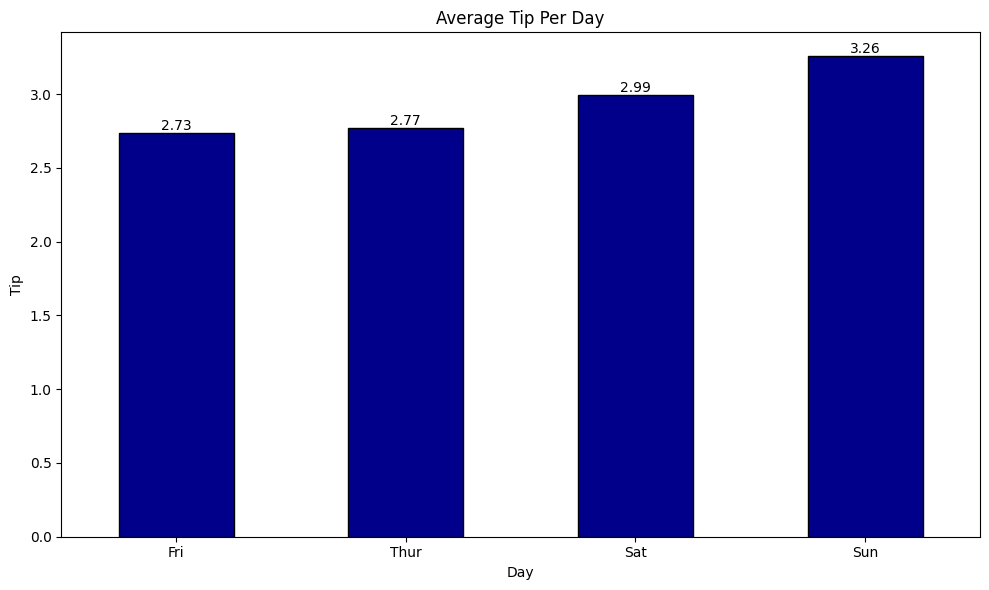

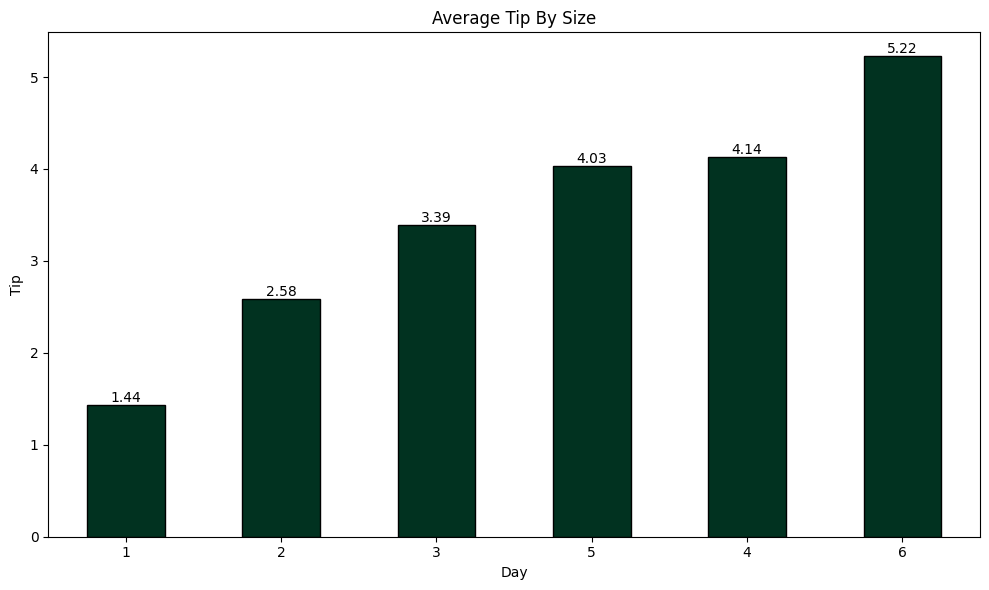

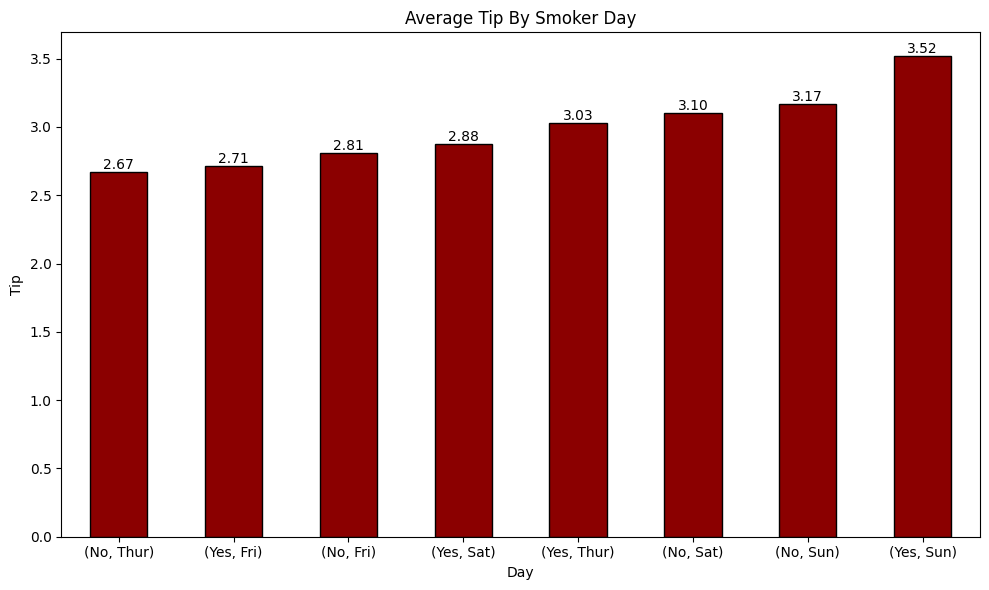

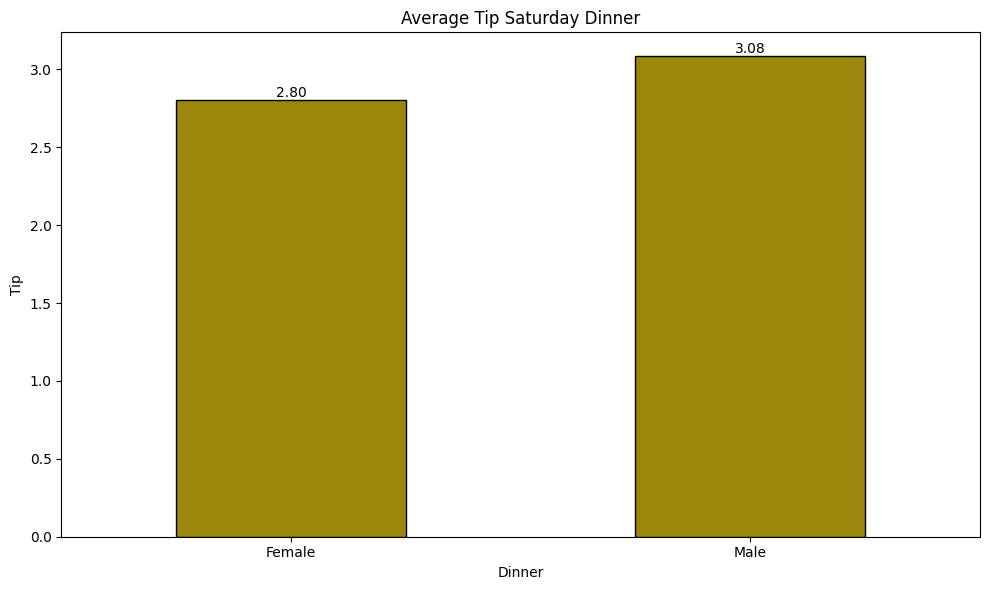

In [34]:
# Plotting bar charts to show average tips under different conditions with distinct colors

plot_bar(
    sorted_mean_tip_per_day,
    title='Average Tip Per Day',
    xlabel='Day',
    ylabel='Tip',
    colors='#00008b'
)

plot_bar(
    sorted_mean_tip_by_size,
    title='Average Tip By Size',
    xlabel='Day',
    ylabel='Tip',
    colors='#013220'
)

plot_bar(
    sorted_mean_tip_by_smoker_day,
    title='Average Tip By Smoker Day',
    xlabel='Day',
    ylabel='Tip',
    colors='#8B0000'
)

plot_bar(
    sorted_mean_tip_Saturday_dinner,
    title='Average Tip Saturday Dinner',
    xlabel='Dinner',
    ylabel='Tip',
    colors='#9B870C'
)



## Data Collection

total_bill: The total amount of the bill that the customer has to pay.

tip: The amount of tip paid by the customer.

sex: Gender of the person who paid the bill (Male or Female).

smoker: Smoking status of the bill payer (Yes for smoker, No for non-smoker).

day: The day of the week when the order was placed (e.g., Thur, Fri, Sat, Sun).

time: The meal during which the order was placed (Lunch or Dinner).

size: The number of people in the group (party size).

Main tip: The percentage of the tip relative to the total bill (tip divided by total_bill multiplied by 100).